# Anime Recommendation System

## Data Collection

Import Library

In [1]:
from google.colab import files
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import calinski_harabasz_score, davies_bouldin_score
import re

Download Dataset

In [2]:
!pip install -q kaggle

In [3]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle
!chmod 600 ~/.kaggle/kaggle.json

In [4]:
!kaggle datasets download -d bhavyadhingra00020/top-anime-dataset-2024

Dataset URL: https://www.kaggle.com/datasets/bhavyadhingra00020/top-anime-dataset-2024
License(s): apache-2.0


In [5]:
!unzip /content/top-anime-dataset-2024.zip

Archive:  /content/top-anime-dataset-2024.zip
  inflating: Top_Anime_data.csv      


In [58]:
df = pd.read_csv('/content/Top_Anime_data.csv')

## Data Understanding

In [59]:
df.head()

,Score,Popularity,Rank,Members,Description,Synonyms,Japanese,English,Type,Episodes,...,Premiered,Broadcast,Producers,Licensors,Studios,Source,Genres,Demographic,Duration,Rating
0,9.38,284,1,710,During their decade-long quest to defeat the D...,Frieren at the Funeral,葬送のフリーレン,Frieren: Beyond Journey's End,TV,28,...,Fall 2023,Fridays at 23:00 (JST),"Aniplex, Dentsu, Shogakukan-Shueisha Productio...","None found, add some",Madhouse,Manga,"AdventureAdventure, DramaDrama, FantasyFantasy",ShounenShounen,24 min. per ep.,PG-13 - Teens 13 or older
1,9.09,3,2,3,After a horrific alchemy experiment goes wrong...,"Hagane no Renkinjutsushi: Fullmetal Alchemist,...",鋼の錬金術師 FULLMETAL ALCHEMIST,Fullmetal Alchemist: Brotherhood,TV,64,...,Spring 2009,Sundays at 17:00 (JST),"Aniplex, Square Enix, Mainichi Broadcasting Sy...","Funimation, Aniplex of America",Bones,Manga,"ActionAction, AdventureAdventure, DramaDrama, ...",ShounenShounen,24 min. per ep.,R - 17+ (violence & profanity)
2,9.07,13,3,2,Eccentric scientist Rintarou Okabe has a never...,NaN,STEINS;GATE,Steins;Gate,TV,24,...,Spring 2011,Wednesdays at 02:05 (JST),"Frontier Works, Media Factory, Kadokawa Shoten...",Funimation,White Fox,Visual novel,"DramaDrama, Sci-FiSci-Fi, SuspenseSuspense",NaN,24 min. per ep.,PG-13 - Teens 13 or older
3,9.06,342,4,630,"Gintoki, Shinpachi, and Kagura return as the f...",Gintama' (2015),銀魂°,Gintama Season 4,TV,51,...,Spring 2015,Wednesdays at 18:00 (JST),"TV Tokyo, Aniplex, Dentsu","Funimation, Crunchyroll",Bandai Namco Pictures,Manga,"ActionAction, ComedyComedy, Sci-FiSci-Fi",ShounenShounen,24 min. per ep.,PG-13 - Teens 13 or older
4,9.05,21,5,2,Seeking to restore humanity's diminishing hope...,NaN,進撃の巨人 Season3 Part.2,Attack on Titan Season 3 Part 2,TV,10,...,Spring 2019,Mondays at 00:10 (JST),"Production I.G, Dentsu, Mainichi Broadcasting ...",Funimation,Wit Studio,Manga,"ActionAction, DramaDrama, SuspenseSuspense",ShounenShounen,23 min. per ep.,R - 17+ (violence & profanity)


In [60]:
print(f'Terdapat  {df.shape[0]} Table dan {df.shape[1]} columns.')

Terdapat  1000 Table dan 22 columns.


In [61]:
for i, (nama_kolom, jumlah) in enumerate(df.count().items(), 1):
    print(f"Kolom {i:2d}: {nama_kolom} - Berjumlah:  {jumlah}")

Kolom  1: Score - Berjumlah:  1000
Kolom  2: Popularity - Berjumlah:  1000
Kolom  3: Rank - Berjumlah:  1000
Kolom  4: Members - Berjumlah:  1000
Kolom  5: Description - Berjumlah:  1000
Kolom  6: Synonyms - Berjumlah:  709
Kolom  7: Japanese - Berjumlah:  999
Kolom  8: English - Berjumlah:  859
Kolom  9: Type - Berjumlah:  1000
Kolom 10: Episodes - Berjumlah:  1000
Kolom 11: Status - Berjumlah:  1000
Kolom 12: Aired - Berjumlah:  1000
Kolom 13: Premiered - Berjumlah:  569
Kolom 14: Broadcast - Berjumlah:  569
Kolom 15: Producers - Berjumlah:  1000
Kolom 16: Licensors - Berjumlah:  1000
Kolom 17: Studios - Berjumlah:  1000
Kolom 18: Source - Berjumlah:  1000
Kolom 19: Genres - Berjumlah:  771
Kolom 20: Demographic - Berjumlah:  521
Kolom 21: Duration - Berjumlah:  1000
Kolom 22: Rating - Berjumlah:  1000


In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 22 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Score        1000 non-null   float64
 1   Popularity   1000 non-null   int64  
 2   Rank         1000 non-null   int64  
 3   Members      1000 non-null   int64  
 4   Description  1000 non-null   object 
 5   Synonyms     709 non-null    object 
 6   Japanese     999 non-null    object 
 7   English      859 non-null    object 
 8   Type         1000 non-null   object 
 9   Episodes     1000 non-null   object 
 10  Status       1000 non-null   object 
 11  Aired        1000 non-null   object 
 12  Premiered    569 non-null    object 
 13  Broadcast    569 non-null    object 
 14  Producers    1000 non-null   object 
 15  Licensors    1000 non-null   object 
 16  Studios      1000 non-null   object 
 17  Source       1000 non-null   object 
 18  Genres       771 non-null    object 
 19  Demogra

### Ringkasan Struktur DataFrame

Terdapat total **22 kolom** dalam dataframe.
- Terdapat **1 kolom** dengan tipe data `float64`, yang merupakan fitur **numerik**:
  - `Score`
- Terdapat **3 kolom** dengan tipe data `int64`, yang juga merupakan fitur **numerik**:
  - `Popularity`, `Rank`, `Members`
- Terdapat **18 kolom** dengan tipe data `object`, yang kemungkinan besar merupakan fitur **kategoris**:
  - `Description`, `Synonyms`, `Japanese`, `English`, `Type`, `Episodes`, `Status`, `Aired`, `Premiered`, `Broadcast`, `Producers`, `Licensors`, `Studios`, `Source`, `Genres`, `Demographic`, `Duration`, `Rating`

**Pilihan Fitur untuk Content-Based Filtering**

Fitur utama yang digunakan:
- `Genres`: Merekomendasikan anime dengan genre serupa.
- `Type`: Membantu menyarankan tipe anime yang sama (TV, Movie, dll).
- `Studios`: Mengarahkan pada anime dengan gaya/kualitas serupa dari studio yang sama.

**Alasan**:  
Fitur-fitur ini cukup, relevan, dan efisien untuk membangun model rekomendasi yang akurat dan mudah diimplementasikan.


In [63]:
df.duplicated().sum()

np.int64(0)

Tidak terdapat data duplikat

In [64]:
df.isnull().sum()

,0
Score,0
Popularity,0
Rank,0
Members,0
Description,0
Synonyms,291
Japanese,1
English,141
Type,0
Episodes,0


## Exploratory Data Analysis

### Deskripsi Variabel

In [65]:
df.columns

Index(['Score', 'Popularity', 'Rank', 'Members', 'Description', 'Synonyms',
       'Japanese', 'English', 'Type', 'Episodes', 'Status', 'Aired',
       'Premiered', 'Broadcast', 'Producers', 'Licensors', 'Studios', 'Source',
       'Genres', 'Demographic', 'Duration', 'Rating'],
      dtype='object')

**Penjelasan Kolom Dataframe**

Kolom datasets anime memiliki informasi berikut:

* **`Score`:** Skor atau rating yang diberikan kepada anime.
* **`Popularity`:** Peringkat popularitas anime.
* **`Rank`:** Peringkat anime berdasarkan kriteria tertentu.
* **`Members`:** Jumlah anggota yang telah menambahkan anime ke daftar mereka di platform.
* **`Description`:** Deskripsi singkat atau ringkasan plot anime.
* **`Synonyms`:** Judul alternatif atau sinonim dari anime.
* **`Japanese`:** Judul anime dalam bahasa Jepang.
* **`English`:** Judul anime dalam bahasa Inggris.
* **`Type`:** Jenis anime (misalnya, TV Series, Movie, OVA, dll.).
* **`Episodes`:** Jumlah episode dalam anime.
* **`Status`:** Status anime (misalnya, ongoing, completed).
* **`Aired`:** Tanggal penayangan anime.
* **`Premiered`:** Musim dan tahun penayangan perdana anime.
* **`Broadcast`:** Informasi tentang siaran anime.
* **`Producers`:** Perusahaan produksi atau produser anime.
* **`Licensors`:** Pihak yang memiliki lisensi anime (misalnya, platform streaming).
* **`Studios`:** Studio animasi yang mengerjakan anime.
* **`Source`:** Sumber materi anime (misalnya, manga, light novel, original).
* **`Genres`:** Genre anime, dipisahkan dengan koma (misalnya, Action, Comedy, Drama).
* **`Demographic`:** Demografi target anime (misalnya, Shonen, Shojo).
* **`Duration`:** Durasi setiap episode anime.
* **`Rating`:** Batasan usia untuk menonton anime.

### Visualisasi

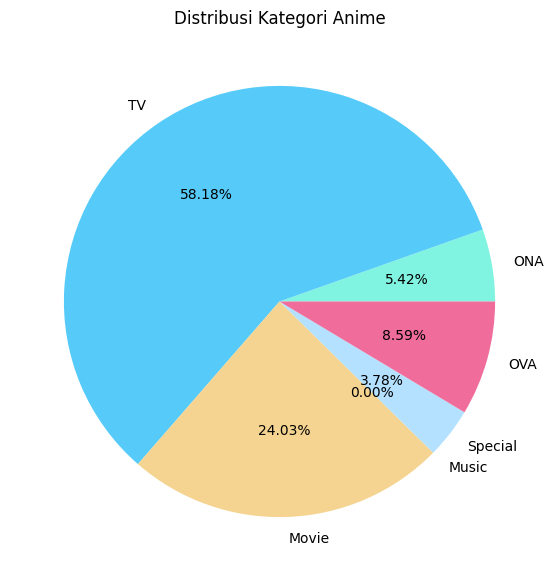

In [66]:
# Hitung jumlah anime untuk setiap kategori
ona = df.loc[df['Type'] == 'ONA'].shape[0]
tv = df.loc[df['Type'] == 'TV'].shape[0]
movie = df.loc[df['Type'] == 'Movie'].shape[0]
music = df.loc[df['Type'] == 'Music'].shape[0]
special = df.loc[df['Type'] == 'Special'].shape[0]
ova = df.loc[df['Type'] == 'OVA'].shape[0]

# Label dan warna untuk setiap kategori
labels = ['ONA', 'TV', 'Movie', 'Music', 'Special', 'OVA']
colors = ['#81F4E1', '#56CBF9', '#F5D491', '#BEB7A4', '#B4E1FF', '#F06C9B']

# Buat pie chart
plt.figure(figsize=(10, 7))
plt.title('Distribusi Kategori Anime')
plt.pie([ona, tv, movie, music, special, ova],
        labels=labels,
        colors=colors,
        autopct='%.2f%%',
        textprops={'color': 'black'})

plt.show()

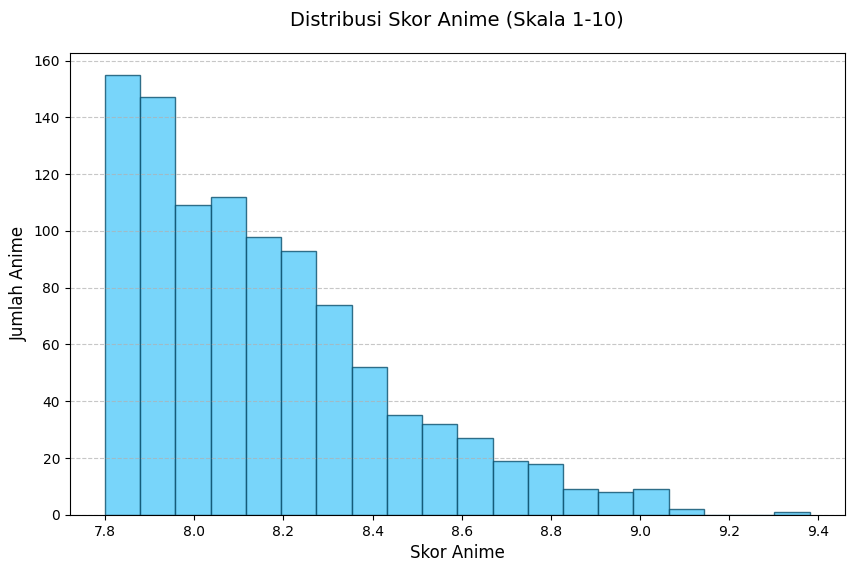

In [67]:
plt.figure(figsize=(10, 6))
plt.hist(df['Score'],
         bins=20,
         color='#56CBF9',
         edgecolor='#0B4F6C',
         alpha=0.8)
plt.xlabel('Skor Anime', fontsize=12)
plt.ylabel('Jumlah Anime', fontsize=12)
plt.title('Distribusi Skor Anime (Skala 1-10)', fontsize=14, pad=20)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [68]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Score,1000.0,8.15658,0.284344,7.8,7.92,8.1,8.3125,9.38
Popularity,1000.0,1805.63700,1888.308553,1.0,413.75,1139.5,2633.7500,12043.00
Rank,1000.0,500.50000,288.819436,1.0,250.75,500.5,750.2500,1000.00
Members,1000.0,223.64800,246.288299,1.0,31.75,132.0,330.0000,998.00


In [69]:
df.sort_values(by='Members', ascending=False).head()

,Score,Popularity,Rank,Members,Description,Synonyms,Japanese,English,Type,Episodes,...,Premiered,Broadcast,Producers,Licensors,Studios,Source,Genres,Demographic,Duration,Rating
282,8.28,156,283,998,Tokyo is currently experiencing rain showers t...,NaN,天気の子,Weathering with You,Movie,1,...,NaN,NaN,"TOHO, JR East Marketing & Communications, Kado...",GKIDS,CoMix Wave Films,Original,"Award WinningAward Winning, DramaDrama, Fantas...",NaN,1 hr. 52 min.,PG-13 - Teens 13 or older
737,7.93,158,738,985,"Having slept through all four of her alarms, t...",It's Difficult to Love an Otaku,ヲタクに恋は難しい,Wotakoi: Love is Hard for Otaku,TV,11,...,Spring 2018,Fridays at 00:55 (JST),"Aniplex, Dentsu, Fuji TV, Half H.P Studio, Ich...","None found, add some",A-1 Pictures,Web manga,NaN,NaN,22 min. per ep.,PG-13 - Teens 13 or older
648,7.99,160,649,973,The Moon Festival is Tootsuki Academy's annual...,"Shokugeki no Soma 3rd Season, Shokugeki no Soma 3",食戟のソーマ 餐ノ皿,Food Wars! The Third Plate,TV,12,...,Fall 2017,Wednesdays at 00:30 (JST),"Lantis, Warner Bros. Japan, KlockWorx, Shueisha",Sentai Filmworks,J.C.Staff,Manga,"GourmetGourmet, EcchiEcchi",ShounenShounen,24 min. per ep.,PG-13 - Teens 13 or older
104,8.55,161,105,965,The aloof protagonist: a bookworm who is deepl...,"KimiSui, Let Me Eat Your Pancreas",君の膵臓をたべたい,I Want To Eat Your Pancreas,Movie,1,...,NaN,NaN,"Aniplex, ABC Animation",Aniplex of America,Studio VOLN,Novel,"DramaDrama, RomanceRomance",NaN,1 hr. 48 min.,PG-13 - Teens 13 or older
197,8.38,162,198,956,"Taking a break from his time as a teacher, the...",Tensura 2,転生したらスライムだった件,That Time I Got Reincarnated as a Slime Season 2,TV,12,...,Winter 2021,Tuesdays at 23:00 (JST),Kodansha,Funimation,8bit,Manga,"ActionAction, AdventureAdventure, ComedyComedy...",ShounenShounen,23 min. per ep.,PG-13 - Teens 13 or older


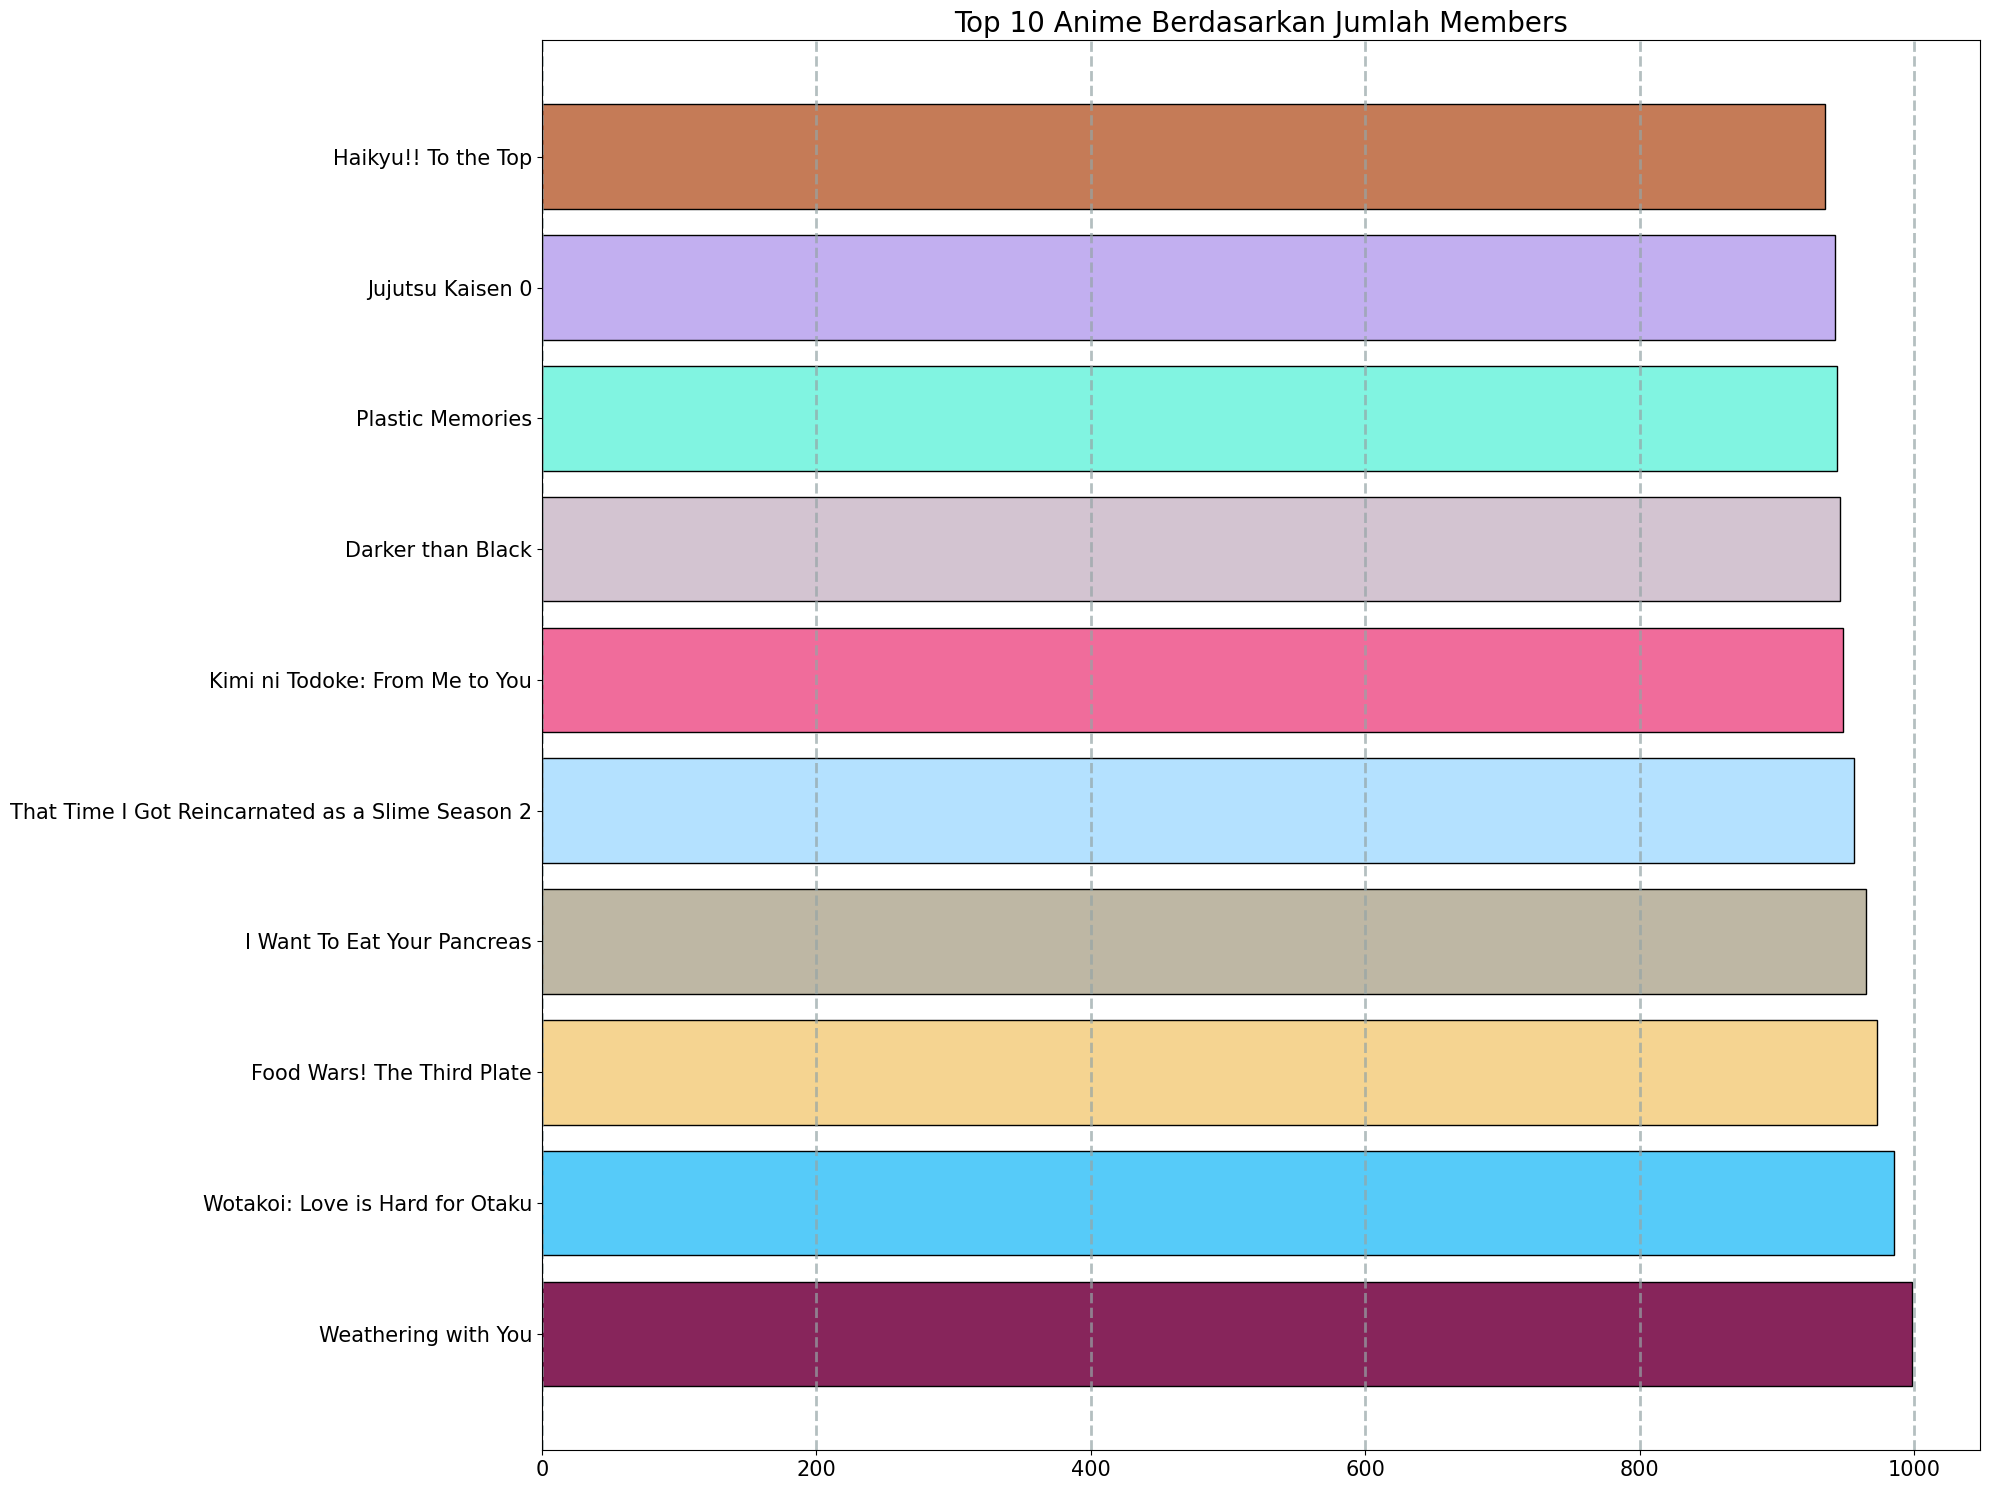

In [70]:
plt.figure(figsize=(20, 15))
top10_anime = df[['English', 'Members']].sort_values(by='Members', ascending=False).head(10)

colors = ['#87255B', '#56CBF9', '#F5D491', '#BEB7A4', '#B4E1FF', '#F06C9B', '#D3C4D1', '#81F4E1', '#C2AFF0', '#C57B57']

labels = top10_anime['English'].values.flatten()
values = top10_anime['Members'].values.flatten()

plt.barh(labels, values, color=colors, edgecolor='black')
plt.grid(color='#95a5a6', linestyle='--', linewidth=2, axis='x', alpha=0.7)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title("Top 10 Anime Berdasarkan Jumlah Members", fontdict={'fontsize': 20})
plt.tight_layout()
plt.show()

In [71]:
df.sort_values(by='Score', ascending=False).head()

,Score,Popularity,Rank,Members,Description,Synonyms,Japanese,English,Type,Episodes,...,Premiered,Broadcast,Producers,Licensors,Studios,Source,Genres,Demographic,Duration,Rating
0,9.38,284,1,710,During their decade-long quest to defeat the D...,Frieren at the Funeral,葬送のフリーレン,Frieren: Beyond Journey's End,TV,28,...,Fall 2023,Fridays at 23:00 (JST),"Aniplex, Dentsu, Shogakukan-Shueisha Productio...","None found, add some",Madhouse,Manga,"AdventureAdventure, DramaDrama, FantasyFantasy",ShounenShounen,24 min. per ep.,PG-13 - Teens 13 or older
1,9.09,3,2,3,After a horrific alchemy experiment goes wrong...,"Hagane no Renkinjutsushi: Fullmetal Alchemist,...",鋼の錬金術師 FULLMETAL ALCHEMIST,Fullmetal Alchemist: Brotherhood,TV,64,...,Spring 2009,Sundays at 17:00 (JST),"Aniplex, Square Enix, Mainichi Broadcasting Sy...","Funimation, Aniplex of America",Bones,Manga,"ActionAction, AdventureAdventure, DramaDrama, ...",ShounenShounen,24 min. per ep.,R - 17+ (violence & profanity)
2,9.07,13,3,2,Eccentric scientist Rintarou Okabe has a never...,NaN,STEINS;GATE,Steins;Gate,TV,24,...,Spring 2011,Wednesdays at 02:05 (JST),"Frontier Works, Media Factory, Kadokawa Shoten...",Funimation,White Fox,Visual novel,"DramaDrama, Sci-FiSci-Fi, SuspenseSuspense",NaN,24 min. per ep.,PG-13 - Teens 13 or older
3,9.06,342,4,630,"Gintoki, Shinpachi, and Kagura return as the f...",Gintama' (2015),銀魂°,Gintama Season 4,TV,51,...,Spring 2015,Wednesdays at 18:00 (JST),"TV Tokyo, Aniplex, Dentsu","Funimation, Crunchyroll",Bandai Namco Pictures,Manga,"ActionAction, ComedyComedy, Sci-FiSci-Fi",ShounenShounen,24 min. per ep.,PG-13 - Teens 13 or older
4,9.05,21,5,2,Seeking to restore humanity's diminishing hope...,NaN,進撃の巨人 Season3 Part.2,Attack on Titan Season 3 Part 2,TV,10,...,Spring 2019,Mondays at 00:10 (JST),"Production I.G, Dentsu, Mainichi Broadcasting ...",Funimation,Wit Studio,Manga,"ActionAction, DramaDrama, SuspenseSuspense",ShounenShounen,23 min. per ep.,R - 17+ (violence & profanity)


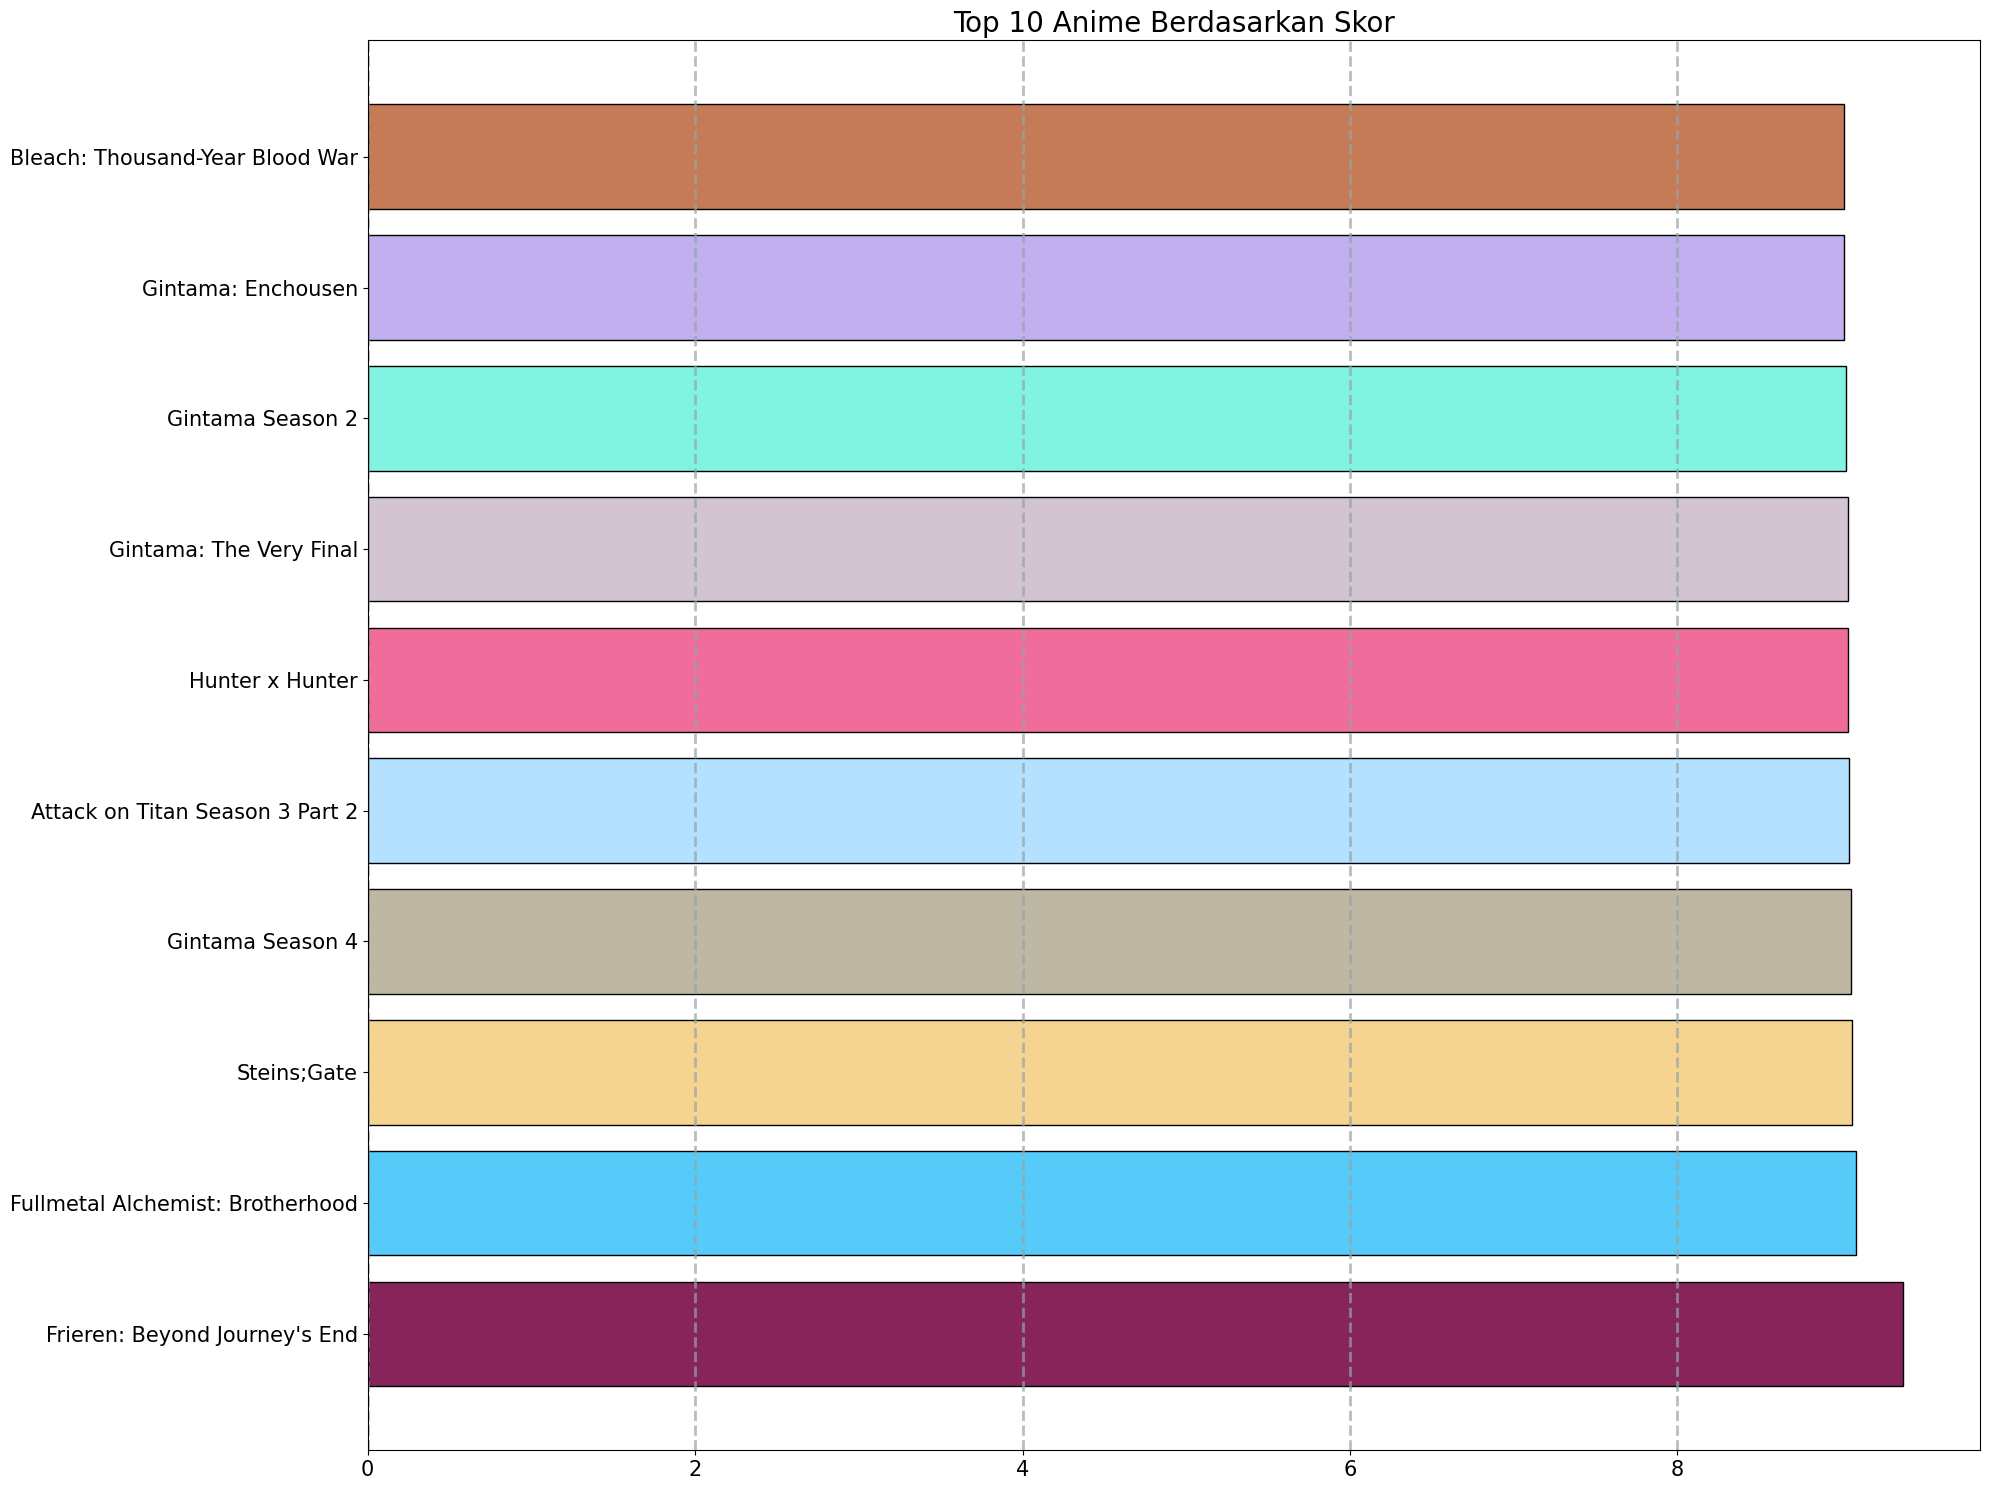

In [72]:
plt.figure(figsize=(20, 15))
top10_anime = df[['English', 'Score']].sort_values(by='Score', ascending=False).head(10)

colors = ['#87255B', '#56CBF9', '#F5D491', '#BEB7A4', '#B4E1FF', '#F06C9B',
          '#D3C4D1', '#81F4E1', '#C2AFF0', '#C57B57']

labels = top10_anime['English'].values.flatten()
values = top10_anime['Score'].values.flatten()

plt.barh(labels, values, color=colors, edgecolor='black')
plt.grid(color='#95a5a6', linestyle='--', linewidth=2, axis='x', alpha=0.7)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title("Top 10 Anime Berdasarkan Skor", fontdict={'fontsize': 20})
plt.tight_layout()
plt.show()

## Data Preparation

In [73]:
def clean_anime_title(text):
    if pd.isna(text):  # Handle missing values
        return ""

    # Hapus URL
    text = re.sub(r"https?://\S+|www\.\S+", "", text)

    # Hapus karakter non-alfanumerik kecuali apostrof, tanda hubung, dan spasi
    text = re.sub(r"[^a-zA-Z0-9'\- ]", "", text)

    # Hapus spasi berlebih
    text = re.sub(r"\s+", " ", text).strip()

    return text
# Eksekusi pembersihan dan buat kolom baru
df['English_clean'] = df['English'].apply(clean_anime_title)

In [74]:
def clean_genres(genre_text):
    if pd.isna(genre_text):
        return ""

    raw_genres = genre_text.split(',')
    cleaned_genres = set()

    for genre in raw_genres:
        genre = genre.strip()
        half = len(genre) // 2

        if len(genre) % 2 == 0 and genre[:half].lower() == genre[half:].lower():
            genre = genre[:half]

        cleaned_genres.add(genre.lower())

    return ", ".join(sorted(cleaned_genres))  # sorted biar konsisten

df['Genres_clean'] = df['Genres'].apply(clean_genres)

In [75]:
def clean_studios(studio_str):
    if pd.isna(studio_str):
        return ""

    studios = [s.strip().lower() for s in studio_str.split(",") if s.strip()]
    return ", ".join(sorted(set(studios)))

df["Studios_clean"] = df["Studios"].apply(clean_studios)

In [76]:
print("Before:", df['Genres'].iloc[0])
print("After:", df['Genres_clean'].iloc[0])

print("Before:", df['English'].iloc[0])
print("After:", df['English_clean'].iloc[0])

print("Before:", df['Studios'].iloc[0])
print("After:", df['Studios_clean'].iloc[0])

Before: AdventureAdventure, DramaDrama, FantasyFantasy
After: adventure, drama, fantasy
Before: Frieren: Beyond Journey's End
After: Frieren Beyond Journey's End
Before: Madhouse
After: madhouse


In [77]:
print(df[['English', 'English_clean']].sample(3))
print(df[['Genres', 'Genres_clean']].sample(3))
print(df[['Studios', 'Studios_clean']].sample(3))

                 English       English_clean
439        Princess Tutu       Princess Tutu
920  One Piece Film: Red  One Piece Film Red
126     Ranking of Kings    Ranking of Kings
                                                Genres  \
13            ActionAction, ComedyComedy, Sci-FiSci-Fi   
806  DramaDrama, MysteryMystery, RomanceRomance, Sc...   
540                                                NaN   

                        Genres_clean  
13            action, comedy, sci-fi  
806  drama, mystery, romance, sci-fi  
540                                   
             Studios    Studios_clean
472   Toei Animation   toei animation
932         SANZIGEN         sanzigen
923  Kyoto Animation  kyoto animation


Membersihkan judul anime dengan:
1. Menghapus URL (jika ada).
2. Menghapus karakter khusus kecuali apostrof (`'`), tanda hubung (`-`), dan spasi.
3. Menghapus spasi berlebih.

In [78]:
df

,Score,Popularity,Rank,Members,Description,Synonyms,Japanese,English,Type,Episodes,...,Licensors,Studios,Source,Genres,Demographic,Duration,Rating,English_clean,Genres_clean,Studios_clean
0,9.38,284,1,710,During their decade-long quest to defeat the D...,Frieren at the Funeral,葬送のフリーレン,Frieren: Beyond Journey's End,TV,28,...,"None found, add some",Madhouse,Manga,"AdventureAdventure, DramaDrama, FantasyFantasy",ShounenShounen,24 min. per ep.,PG-13 - Teens 13 or older,Frieren Beyond Journey's End,"adventure, drama, fantasy",madhouse
1,9.09,3,2,3,After a horrific alchemy experiment goes wrong...,"Hagane no Renkinjutsushi: Fullmetal Alchemist,...",鋼の錬金術師 FULLMETAL ALCHEMIST,Fullmetal Alchemist: Brotherhood,TV,64,...,"Funimation, Aniplex of America",Bones,Manga,"ActionAction, AdventureAdventure, DramaDrama, ...",ShounenShounen,24 min. per ep.,R - 17+ (violence & profanity),Fullmetal Alchemist Brotherhood,"action, adventure, drama, fantasy",bones
2,9.07,13,3,2,Eccentric scientist Rintarou Okabe has a never...,NaN,STEINS;GATE,Steins;Gate,TV,24,...,Funimation,White Fox,Visual novel,"DramaDrama, Sci-FiSci-Fi, SuspenseSuspense",NaN,24 min. per ep.,PG-13 - Teens 13 or older,SteinsGate,"drama, sci-fi, suspense",white fox
3,9.06,342,4,630,"Gintoki, Shinpachi, and Kagura return as the f...",Gintama' (2015),銀魂°,Gintama Season 4,TV,51,...,"Funimation, Crunchyroll",Bandai Namco Pictures,Manga,"ActionAction, ComedyComedy, Sci-FiSci-Fi",ShounenShounen,24 min. per ep.,PG-13 - Teens 13 or older,Gintama Season 4,"action, comedy, sci-fi",bandai namco pictures
4,9.05,21,5,2,Seeking to restore humanity's diminishing hope...,NaN,進撃の巨人 Season3 Part.2,Attack on Titan Season 3 Part 2,TV,10,...,Funimation,Wit Studio,Manga,"ActionAction, DramaDrama, SuspenseSuspense",ShounenShounen,23 min. per ep.,R - 17+ (violence & profanity),Attack on Titan Season 3 Part 2,"action, drama, suspense",wit studio
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,7.80,4003,996,31,Half retelling of the original Frontier series...,"Macross Frontier the Movie, Gekijouban Macross...",劇場版 マクロスＦ 虚空歌姫 ～イツワリノウタヒメ～,Macross Frontier: The False Songstress,Movie,1,...,"None found, add some","Satelight, 8bit",Original,"ActionAction, RomanceRomance, Sci-FiSci-Fi",NaN,1 hr. 59 min.,PG-13 - Teens 13 or older,Macross Frontier The False Songstress,"action, romance, sci-fi","8bit, satelight"
996,7.80,1658,997,136,"Not so long ago, mysterious structures called ...",Magi: Adventure of Sinbad OVA,マギ シンドバッドの冒険,NaN,OVA,5,...,"None found, add some",Lay-duce,Manga,"ActionAction, AdventureAdventure, FantasyFantasy",ShounenShounen,24 min. per ep.,PG-13 - Teens 13 or older,,"action, adventure, fantasy",lay-duce
997,7.80,3114,998,50,Fifteen years ago in a barren stretch of the P...,NaN,名探偵コナン 水平線上の陰謀,Detective Conan Movie 09: Strategy Above the D...,Movie,1,...,"None found, add some",TMS Entertainment,Manga,"AdventureAdventure, ComedyComedy, MysteryMystery",ShounenShounen,1 hr. 50 min.,PG-13 - Teens 13 or older,Detective Conan Movie 09 Strategy Above the De...,"adventure, comedy, mystery",tms entertainment
998,7.80,3194,999,47,Serial murders involving all kinds have happen...,Meitantei Conan: Senritsu no Gakufu [Full Score],名探偵コナン 戦慄の楽譜（フルスコア）,Detective Conan Movie 12: Full Score of Fear,Movie,1,...,"None found, add some",TMS Entertainment,Manga,"AdventureAdventure, ComedyComedy, MysteryMystery",ShounenShounen,1 hr. 56 min.,PG-13 - Teens 13 or older,Detective Conan Movie 12 Full Score of Fear,"adventure, comedy, mystery",tms entertainment


In [79]:
df.astype(str).duplicated().sum()

np.int64(0)

Tidak terdapat data duplikat

In [80]:
df.isnull().sum()

,0
Score,0
Popularity,0
Rank,0
Members,0
Description,0
Synonyms,291
Japanese,1
English,141
Type,0
Episodes,0


Terdapat *Missing value* pada kolom `sypnopsis, Japanese, English, Premiered, Broadcast, Genres dan Demographic`

In [81]:
df = df.dropna()

Menghapus data *Missing value*

In [82]:
df.isnull().sum()

,0
Score,0
Popularity,0
Rank,0
Members,0
Description,0
Synonyms,0
Japanese,0
English,0
Type,0
Episodes,0


In [83]:
print(f'Terdapat  {df.shape[0]} Table dan {df.shape[1]} columns.')

Terdapat  162 Table dan 25 columns.


In [84]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Score,162.0,8.259938,0.343351,7.81,7.99,8.18,8.4775,9.38
Popularity,162.0,928.870370,1097.919422,1.00,202.00,559.50,1119.2500,5302.00
Rank,162.0,415.327160,293.354212,1.00,142.00,402.50,651.2500,982.00
Members,162.0,295.604938,277.313518,1.00,35.75,248.00,482.2500,973.00


Fungsi `describe()` memberikan informasi statistik pada masing-masing kolom, antara lain:

- `Count` adalah jumlah sampel pada data.
- `Mean` adalah nilai rata-rata.
- `Std` adalah standar deviasi.
- `Min` yaitu nilai minimum setiap kolom.
- `25%` adalah kuartil pertama. Kuartil adalah nilai yang menandai batas interval dalam empat bagian sebaran yang sama.
- `50%` adalah kuartil kedua, atau biasa juga disebut median (nilai tengah). - 75% adalah kuartil ketiga.
- `Max` adalah nilai maksimum.

## Model Development

In [85]:
df

,Score,Popularity,Rank,Members,Description,Synonyms,Japanese,English,Type,Episodes,...,Licensors,Studios,Source,Genres,Demographic,Duration,Rating,English_clean,Genres_clean,Studios_clean
0,9.38,284,1,710,During their decade-long quest to defeat the D...,Frieren at the Funeral,葬送のフリーレン,Frieren: Beyond Journey's End,TV,28,...,"None found, add some",Madhouse,Manga,"AdventureAdventure, DramaDrama, FantasyFantasy",ShounenShounen,24 min. per ep.,PG-13 - Teens 13 or older,Frieren Beyond Journey's End,"adventure, drama, fantasy",madhouse
1,9.09,3,2,3,After a horrific alchemy experiment goes wrong...,"Hagane no Renkinjutsushi: Fullmetal Alchemist,...",鋼の錬金術師 FULLMETAL ALCHEMIST,Fullmetal Alchemist: Brotherhood,TV,64,...,"Funimation, Aniplex of America",Bones,Manga,"ActionAction, AdventureAdventure, DramaDrama, ...",ShounenShounen,24 min. per ep.,R - 17+ (violence & profanity),Fullmetal Alchemist Brotherhood,"action, adventure, drama, fantasy",bones
3,9.06,342,4,630,"Gintoki, Shinpachi, and Kagura return as the f...",Gintama' (2015),銀魂°,Gintama Season 4,TV,51,...,"Funimation, Crunchyroll",Bandai Namco Pictures,Manga,"ActionAction, ComedyComedy, Sci-FiSci-Fi",ShounenShounen,24 min. per ep.,PG-13 - Teens 13 or older,Gintama Season 4,"action, comedy, sci-fi",bandai namco pictures
6,9.04,9,7,2,Hunters devote themselves to accomplishing haz...,HxH (2011),HUNTER×HUNTER（ハンター×ハンター）,Hunter x Hunter,TV,148,...,VIZ Media,Madhouse,Manga,"ActionAction, AdventureAdventure, FantasyFantasy",ShounenShounen,23 min. per ep.,PG-13 - Teens 13 or older,Hunter x Hunter,"action, adventure, fantasy",madhouse
7,9.03,393,8,555,"After a one-year hiatus, Shinpachi Shimura ret...",Gintama (2011),銀魂',Gintama Season 2,TV,51,...,"None found, add some",Sunrise,Manga,"ActionAction, ComedyComedy, Sci-FiSci-Fi",ShounenShounen,24 min. per ep.,PG-13 - Teens 13 or older,Gintama Season 2,"action, comedy, sci-fi",sunrise
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
954,7.82,1266,955,189,"Following their heroic efforts at Walter Park,...",Welcome to Demon School! Iruma-kun 3rd Season,魔入りました！入間くん,Welcome to Demon School! Iruma-kun Season 3,TV,21,...,"None found, add some",Bandai Namco Pictures,Manga,"ComedyComedy, FantasyFantasy",ShounenShounen,24 min. per ep.,PG-13 - Teens 13 or older,Welcome to Demon School Iruma-kun Season 3,"comedy, fantasy",bandai namco pictures
964,7.82,565,965,403,"Seikyou Private Academy, built on the intrigue...",Tasogare Otome x Amnesia,黄昏乙女×アムネジア,Dusk Maiden of Amnesia,TV,12,...,Sentai Filmworks,SILVER LINK.,Manga,"HorrorHorror, MysteryMystery, RomanceRomance, ...",ShounenShounen,23 min. per ep.,R - 17+ (violence & profanity),Dusk Maiden of Amnesia,"horror, mystery, romance, supernatural",silver link.
974,7.81,92,975,1,"For weeks, Atsushi Nakajima's orphanage has be...","Literary Stray Dogs, BSD",文豪ストレイドッグス,Bungo Stray Dogs,TV,12,...,"Funimation, Crunchyroll",Bones,Manga,"ActionAction, MysteryMystery, SupernaturalSupe...",SeinenSeinen,23 min. per ep.,R - 17+ (violence & profanity),Bungo Stray Dogs,"action, mystery, supernatural",bones
975,7.81,250,976,769,After his confrontation in the Nether with his...,"Enen no Shouboutai 2nd Season, Fire Force 2nd ...",炎炎ノ消防隊 弐ノ章,Fire Force Season 2,TV,24,...,Funimation,David Production,Manga,"ActionAction, FantasyFantasy, Sci-FiSci-Fi",ShounenShounen,24 min. per ep.,PG-13 - Teens 13 or older,Fire Force Season 2,"action, fantasy, sci-fi",david production


In [86]:
data = df.drop(columns=[
    'Score',
    'Popularity',
    'Rank',
    'Members',
    'Description',
    'Synonyms',
    'Japanese',
    'English',
    'Genres',
    'Episodes',
    'Status',
    'Aired',
    'Premiered',
    'Broadcast',
    'Producers',
    'Licensors',
    'Source',
    'Duration',
    'Demographic'
])

Mengahapus kolom yang tidak dibutuhkan pada model kali ini.

In [87]:
data

,Type,Studios,Rating,English_clean,Genres_clean,Studios_clean
0,TV,Madhouse,PG-13 - Teens 13 or older,Frieren Beyond Journey's End,"adventure, drama, fantasy",madhouse
1,TV,Bones,R - 17+ (violence & profanity),Fullmetal Alchemist Brotherhood,"action, adventure, drama, fantasy",bones
3,TV,Bandai Namco Pictures,PG-13 - Teens 13 or older,Gintama Season 4,"action, comedy, sci-fi",bandai namco pictures
6,TV,Madhouse,PG-13 - Teens 13 or older,Hunter x Hunter,"action, adventure, fantasy",madhouse
7,TV,Sunrise,PG-13 - Teens 13 or older,Gintama Season 2,"action, comedy, sci-fi",sunrise
...,...,...,...,...,...,...
954,TV,Bandai Namco Pictures,PG-13 - Teens 13 or older,Welcome to Demon School Iruma-kun Season 3,"comedy, fantasy",bandai namco pictures
964,TV,SILVER LINK.,R - 17+ (violence & profanity),Dusk Maiden of Amnesia,"horror, mystery, romance, supernatural",silver link.
974,TV,Bones,R - 17+ (violence & profanity),Bungo Stray Dogs,"action, mystery, supernatural",bones
975,TV,David Production,PG-13 - Teens 13 or older,Fire Force Season 2,"action, fantasy, sci-fi",david production


### Model Content Based Filtering (dengan Filter Genres)

In [88]:
tfid = TfidfVectorizer()
tfid.fit(data['Genres_clean'])

tfid.get_feature_names_out()

array(['action', 'adventure', 'award', 'comedy', 'drama', 'ecchi',
       'fantasy', 'fi', 'girls', 'gourmet', 'horror', 'life', 'love',
       'mystery', 'of', 'romance', 'sci', 'slice', 'sports',
       'supernatural', 'suspense', 'winning'], dtype=object)

In [89]:
tfidf_matrix = tfid.fit_transform(data['Genres_clean'])

tfidf_matrix.shape

(162, 22)

In [90]:
tfidf_matrix.todense()

matrix([[0.        , 0.57461624, 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.43008054, 0.5187581 , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.34731701, 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        ...,
        [0.40541349, 0.        , 0.        , ..., 0.57936409, 0.        ,
         0.        ],
        [0.34421609, 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ]])

In [91]:
pd.DataFrame(
    tfidf_matrix.todense(),
    columns=tfid.get_feature_names_out(),
    index=data.Genres_clean
).sample(22, axis=1).sample(10, axis=0)

,life,romance,of,sports,gourmet,suspense,supernatural,action,slice,mystery,...,award,ecchi,horror,fi,winning,fantasy,drama,comedy,girls,adventure
Genres_clean,,,,,,,,,,,,,,,,,,,,,
"comedy, romance",0.0,0.757751,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,...,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.652543,0.0,0.000000
"action, comedy, sci-fi",0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.347317,0.0,0.0,...,0.000000,0.0,0.0,0.605763,0.000000,0.000000,0.000000,0.381409,0.0,0.000000
"action, comedy",0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.673290,0.0,0.0,...,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.739378,0.0,0.000000
"action, sci-fi",0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.375719,0.0,0.0,...,0.000000,0.0,0.0,0.655300,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
"action, adventure, supernatural",0.0,0.000000,0.0,0.0,0.0,0.0,0.673885,0.471555,0.0,0.0,...,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.568784
"action, fantasy",0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.651499,0.0,0.0,...,0.000000,0.0,0.0,0.000000,0.000000,0.758649,0.000000,0.000000,0.0,0.000000
"action, adventure, fantasy",0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.512257,0.0,0.0,...,0.000000,0.0,0.0,0.000000,0.000000,0.596506,0.000000,0.000000,0.0,0.617878
"award winning, drama, romance, sci-fi",0.0,0.300870,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,...,0.490914,0.0,0.0,0.411504,0.490914,0.000000,0.298014,0.000000,0.0,0.000000
"action, adventure, fantasy, romance",0.0,0.546891,0.0,0.0,0.0,0.0,0.000000,0.428863,0.0,0.0,...,0.000000,0.0,0.0,0.000000,0.000000,0.499397,0.000000,0.000000,0.0,0.517290


Output `matriks tf-idf` di atas menunjukkan hubungan antara nama anime terhadap kategori yang dipilih. Matriks ini menunjukkan seberapa besar korelasi antara Anime terhadap kategori yang dipilih.

In [92]:
cosine_sim = cosine_similarity(tfidf_matrix)
cosine_sim

array([[1.        , 0.90279053, 0.        , ..., 0.        , 0.22235572,
        0.        ],
       [0.90279053, 1.        , 0.14937428, ..., 0.17436045, 0.34878128,
        0.        ],
       [0.        , 0.14937428, 1.        , ..., 0.140807  , 0.84689797,
        0.24888574],
       ...,
       [0.        , 0.17436045, 0.140807  , ..., 1.        , 0.13954985,
        0.        ],
       [0.22235572, 0.34878128, 0.84689797, ..., 0.13954985, 1.        ,
        0.        ],
       [0.        , 0.        , 0.24888574, ..., 0.        , 0.        ,
        1.        ]])

In [93]:
cosine_sim_df = pd.DataFrame(cosine_sim, index=data['English_clean'], columns=data['English_clean'])
print('Shape:', cosine_sim_df.shape)

cosine_sim_df.sample(5, axis=1).sample(5, axis=0)

Shape: (162, 162)


English_clean,Honey and Clover,That Time I Got Reincarnated as a Slime Season 3,Mushi-shi Next Passage Part 2,Food Wars The Second Plate,Natsume's Book of Friends Season 4
English_clean,,,,,
The World God Only Knows II,0.609636,0.243869,0.212646,0.000000,0.243545
Fire Force Season 2,0.000000,0.362067,0.000000,0.000000,0.000000
The Case Study of Vanitas Part 2,0.000000,0.452734,0.300988,0.000000,0.000000
Delicious in Dungeon,0.202442,0.404022,0.000000,0.560087,0.000000
Hozuki's Coolheadedness 2 Part 2,0.358067,0.714611,0.000000,0.000000,0.000000


In [94]:
def anime_recommendations(anime_name, similarity_data=cosine_sim_df, items=data[['English_clean','Genres_clean']], k=5):

    index = similarity_data.loc[:,anime_name].to_numpy().argpartition(
        range(-1, -k, -1))

    closest = similarity_data.columns[index[-1:-(k+2):-1]]
    closest = closest.drop(anime_name, errors='ignore')

    return pd.DataFrame(closest).merge(items).head(k)

In [95]:
data[data.English_clean.eq('One Piece')]

,Type,Studios,Rating,English_clean,Genres_clean,Studios_clean
50,TV,Toei Animation,PG-13 - Teens 13 or older,One Piece,"action, adventure, fantasy",toei animation


In [96]:
anime_recommendations('One Piece')

,English_clean,Genres_clean
0,Naruto Shippuden,"action, adventure, fantasy"
1,Shangri-La Frontier,"action, adventure, fantasy"
2,Hunter x Hunter,"action, adventure, fantasy"
3,Hunter x Hunter,"action, adventure, fantasy"
4,DGray-man,"action, adventure, fantasy"


Sistem telah berhasil merekomendasikan top 5 persen anime yang mirip dengan *One Piece*, yaitu beberapa film dan seri dari *One Piece* itu sendiri. Jadi, jika pengguna menyukai *One Piece*, maka sistem dapat merekomendasikan seri atau movie *One Piece* lainnya.

### Model K-Nearest Neighbor

In [97]:
animedf_name = pd.DataFrame({'English_clean': data['English_clean']})
animedf_name.head()

,English_clean
0,Frieren Beyond Journey's End
1,Fullmetal Alchemist Brotherhood
3,Gintama Season 4
6,Hunter x Hunter
7,Gintama Season 2


In [98]:
data.set_index('English_clean',inplace=True)

In [99]:
data_n = data[['Genres_clean', 'Type', 'Studios']]

In [100]:
data_features = pd.get_dummies(data_n[['Type', 'Studios']])
data_features.index = data.index

In [101]:
model = NearestNeighbors(metric='euclidean')
model.fit(data_features)

NearestNeighbors(metric='euclidean')

In [102]:
def Recommended_model(anime_name: str, recommend_anime: int = 5):
    if anime_name not in data_features.index:
        return f"❌ Anime '{anime_name}' tidak ditemukan dalam data."

    print(f"✅ Apabila pengguna menyukai anime: {anime_name}")
    print(f"📌 Berikut ini adalah {recommend_anime} anime yang mungkin juga disukai:")

    # Cari tetangga terdekat
    distances, neighbors = model.kneighbors(
        data_features.loc[[anime_name]], n_neighbors=recommend_anime + 1
    )

    similar_anime = []
    similar_distance = []

    for idx, distance in zip(neighbors[0][1:], distances[0][1:]):  # skip self
        similar_anime.append(data_features.index[idx])
        similar_distance.append(f"{round(100 - distance, 2)}%")

    return pd.DataFrame({
        "Anime Name": similar_anime,
        "Similarity Score": similar_distance
    })

In [103]:
Recommended_model(animedf_name.iloc[21]['English_clean'])

✅ Apabila pengguna menyukai anime: Oshi No Ko
📌 Berikut ini adalah 5 anime yang mungkin juga disukai:


,Anime Name,Similarity Score
0,Sleepy Princess in the Demon Castle,100.0%
1,Gintama Season 4,98.59%
2,Frieren Beyond Journey's End,98.59%
3,Gintama Season 2,98.59%
4,Bleach Thousand-Year Blood War,98.59%


from matplotlib import pyplot as plt
_df_0['index'].plot(kind='hist', bins=20, title='index')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_1.groupby('Anime Name').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_2.groupby('Similarity Score').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['index']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'index'}, axis=1)
              .sort_values('index', ascending=True))
  xs = counted['index']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_3.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Anime Name')):
  _plot_series(series, series_name, i)
  fig.legend(title='Anime Name', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['index']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'index'}, axis=1)
              .sort_values('index', ascending=True))
  xs = counted['index']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_4.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Similarity Score')):
  _plot_series(series, series_name, i)
  fig.legend(title='Similarity Score', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_5['index'].plot(kind='line', figsize=(8, 4), title='index')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Similarity Score'].value_counts()
    for x_label, grp in _df_6.groupby('Anime Name')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Anime Name')
_ = plt.ylabel('Similarity Score')

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_7['Anime Name'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_7, x='index', y='Anime Name', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_8['Similarity Score'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_8, x='index', y='Similarity Score', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

## Evaluation

In [105]:
def evaluate_recommendation(anime_name: str, top_n: int = 5):
    recommendations = Recommended_model(anime_name, recommend_anime=top_n)

    if isinstance(recommendations, str):
        return recommendations

    original_genres = set(str(data.loc[anime_name, 'Genres_clean']).lower().split())

    genre_matches = []
    for rec_name in recommendations['Anime Name']:
        rec_genres = set(str(data.loc[rec_name, 'Genres_clean']).lower().split())
        intersection = original_genres & rec_genres
        similarity_score = len(intersection) / len(original_genres) if original_genres else 0
        genre_matches.append(f"{round(similarity_score * 100, 2)}%")

    recommendations['Genre Similarity'] = genre_matches
    return recommendations

In [110]:
evaluate_recommendation("Gintama", top_n=10)

✅ Apabila pengguna menyukai anime: Gintama
📌 Berikut ini adalah 10 anime yang mungkin juga disukai:


,Anime Name,Similarity Score,Genre Similarity
0,Gintama Season 2,100.0%,100.0%
1,Gintama,100.0%,100.0%
2,Planetes,100.0%,33.33%
3,Mobile Suit Gundam The Origin - Advent of the ...,100.0%,66.67%
4,InuYasha The Final Act,100.0%,33.33%
5,Outlaw Star,100.0%,100.0%
6,Yakitate Japan,100.0%,33.33%
7,InuYasha,100.0%,33.33%
8,Kaguya-sama Love is War - Ultra Romantic,98.59%,33.33%
9,Gintama Season 5,98.59%,100.0%
